In [1]:
cd ..

/Users/A.VILLAMANRIQUE/repositories/web-file


In [3]:
import pandas as pd
from configparser import ConfigParser
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

from scripts import CONF_INI
from scraper.twitter import Twitter
from preparation.data_manager import DataManager
from processing.visualization import Visual
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

# 1. Read Tweets Profile

In [3]:
cfg = ConfigParser()
cfg.read(CONF_INI)
data_dir = cfg["PATHS"]["data_clean"]
manager = DataManager()
profiles = manager.read_profiles(data_dir)

# 2. WorldCloud

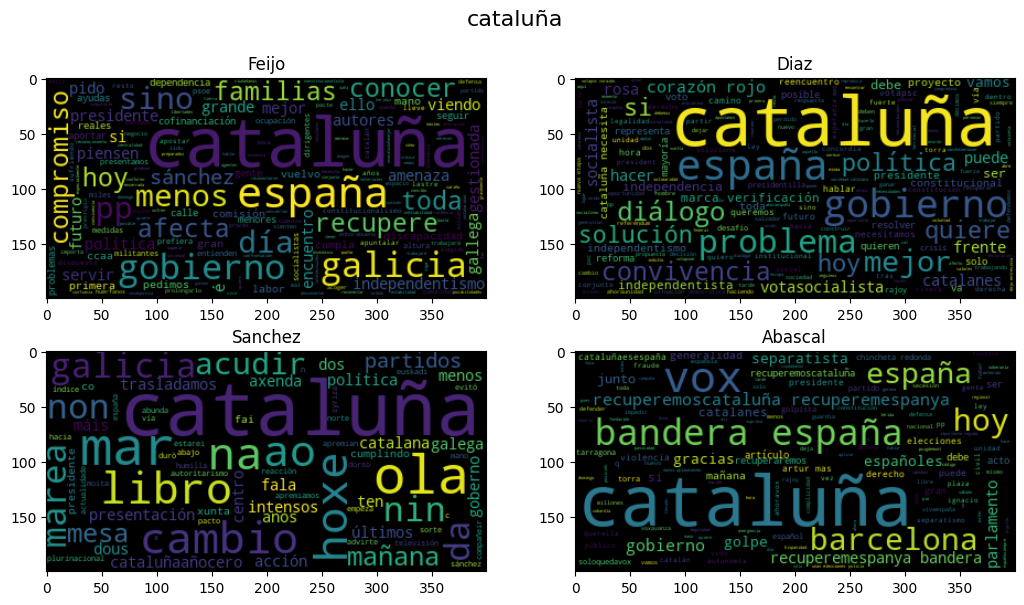

In [12]:
QUERY = "cataluña"
profiles_kw = manager.collect_keyword(profiles, QUERY)
Visual.create_wordcloud(profiles_kw, manager.NAMES, QUERY)

# 3. Wordnet

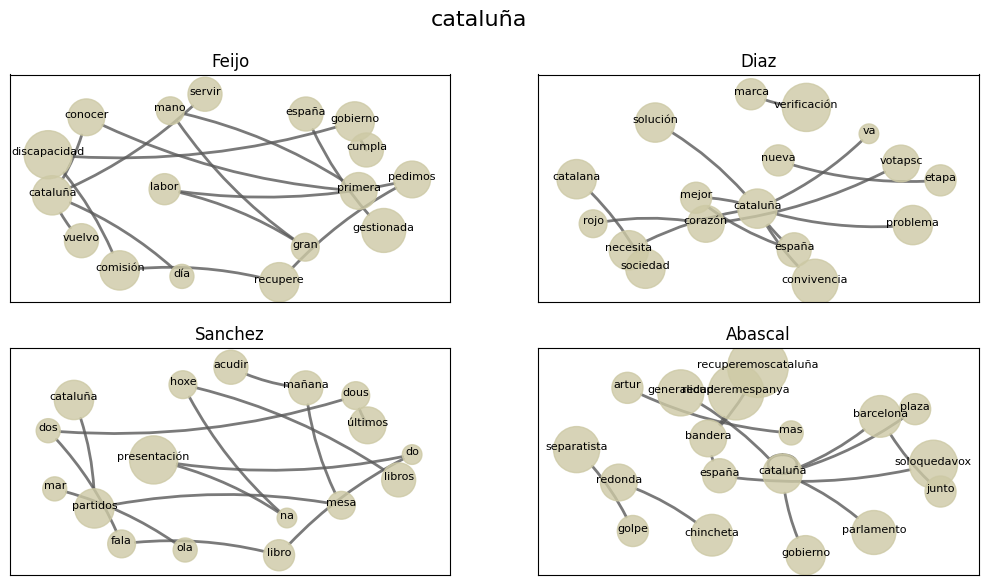

In [13]:
Visual.word_net(profiles_kw, manager.NAMES, 15, QUERY)

# 4. Question and Answering

In [4]:
from modeling.extractive_qa import ExtractiveQA

model_path = "minilm-uncased-squad2"
qa_model = ExtractiveQA(model_path)

In [5]:
profile = pd.read_csv("data/processed/translated/sanchezcastejon.csv", sep=";")
answer = qa_model.answer_from_profile(profile, "what do you want", "energy")
answer

100%|██████████| 186/186 [00:17<00:00, 10.63it/s]


,date,tweet,answer
3,2022-12-21 18:43:04+00:00,"Quienes más tienen deben contribuir más. Es lo justo. Los impuestos a la banca, energéticas y grandes fortunas aprobados hoy, financiarán las medidas del Gobierno para paliar el impacto de la inflación en la clase trabajadora. Y una vez más, con el Partido Popular en contra. https://t.co/083uxbGyI2",those who have more should contribute more
21,2022-12-15 22:32:17+00:00,"No hay más tiempo que perder, debemos proteger a las familias y empresas poniéndole tope al gas. Hemos dado directrices claras para que los ministros de Energía alcancen un acuerdo definitivo el próximo lunes. #EUCO https://t.co/Om6jmzreMz","there is no more time to waste, we must protect families and companies by putting a cap on gas"
37,2022-12-09 12:33:17+00:00,"El #H2MED será el primer gran corredor de hidrógeno de la UE, una infraestructura para garantizar el suministro energético de la Unión. Gracias, @vonderleyen, por tu compromiso, y a mis colegas @EmmanuelMacron y @antoniocostapm, por vuestro trabajo para el impulso del proyecto. https://t.co/6P2ooAYe4q","the # h2med will be the first major hydrogen corridor in the eu, an infrastructure to guarantee the union's energy supply"
59,2022-12-01 11:48:23+00:00,"España está a la altura de la revolución energética, apostando por la sostenibilidad, la autonomía y la reindustrialización del país. La decisión de @Cepsa de crear en Andalucía uno de los mayores centros de hidrógeno verde de Europa es un paso fundamental. #ValleAndaluzH2Verde https://t.co/BhO5itRZc7","spain is at the height of the energy revolution, betting on the sustainability, autonomy and reindustrialization of the country"
64,2022-11-30 08:38:21+00:00,"Gobernamos para la mayoría social de este país. Otros sirven a una minoría absoluta, el 0,2% de la población, cuando votan en contra de los impuestos a las grandes fortunas y entidades financieras y energéticas. https://t.co/9449DB8q1l",we govern for the social majority of this country
...,...,...,...
17437,2011-10-31 16:33:24+00:00,"El incisivo Rajoy promete un mix energético que garantice el suministro, competitividad y demás generalidades.No aclara futuro de nucleares","the incisive rajoy promises an energy mix that guarantees supply, competitiveness and other generalities"
18186,2011-08-10 15:33:28+00:00,"Manifiesto moveon.org: 1) inversión en infraestructuras, 2) crear empleos sector energías renovables, 3 y 4) inversión en educacion&sanidad","investment in infrastructure, 2 ) create jobs in the renewable energy sector, 3 and 4 ) investment in education & health"
18965,2011-04-11 17:56:14+00:00,Frases xra recordar: el portavoz del gobierno de Castilla y Leon (PP) dijo de la energía nuclear k era más segura que el salón de su casa...,nuclear energy was safer than the living room of his house
19091,2011-03-16 18:35:05+00:00,"FAES (7): Hmmm, no encuentro ninguna medida de ahorro energético en el informe de la FAES...será que no lo consideran necesario...",i can't find any energy saving measures in the faes report


In [6]:
profile = pd.read_csv("data/processed/translated/sanchezcastejon.csv", sep=";")
answer = qa_model.answer_from_profile_fast(profile, "what do you want", "energy")
answer

  0%|          | 0/186 [00:00<?, ?it/s]

: 

: 